# Autómatas celulares

Los autómatas celulares nacen con el trabajo de Von Neumann a finales de la década de 1940 con su trabajo "*The General and Logical Theory of Automata"* en el que se plantean por primera vez las ideas para una máquina capaz de autorreplicarse. Trabajó sobre un sistema bidimensional discreto para desarrollar dinámicas bastante complejas que además fueran autorreplicables [16,28].

De acuerdo con [13], podemos pensar en un autómata celular como un conjunto de células que tienen diferentes comportamientos en el tiempo y que interactúan entre sí, de la misma manera que en sistema biológico de donde se obtiene su nombre.

La implementación computacional de un autómata celular por lo general se hace sobre matrices, por lo que el sistema que se quiere modelar se describe sobre una malla de tamaño regular, como en la figura (2-6). Una vez se definen las características de cada célula y sus relaciones con las demás se establece una equivalencia con un conjunto de valores o caracteres que conoceremos como estados del autómata y finalmente, sobre esos estados definiremos las reglas de comportamiento para nuestro modelo.

![texto del enlace](Imagenes/ACaMatriz.PNG)

A continuación definiremos los elementos que componen a un autómata celular:

### Espacio de células

Un espacio de células $\mathcal{L}$ es el conjunto donde viven e interactuan todas las células que se consideran para el modelo. En general este espacio es discreto, regular y finito, esto último debido a las limitaciones computacionales con las que se construyen los modelos en autómatas celulares.

La conición de regularidad de nuestro espacio de células se refiere a que las celdas que lo conforman se organizan de una manera regular, con lo que podemos dotar al espacio $\mathcal{L}$ de una dimensión de la forma $n_1\times\cdots\times n_m$ para $n_1,\cdots,n_m\in\mathbb{Z}$.

**Proposición 2.5.1:** Todo espacio de células es un conjunto enumerable.

La demostración de esta proposición se deduce directamente de la definición de espacio de células.

$\underline{\textit{Nota:}}$ En adelante cuando hablemos de un espacio de células se asumira que la dimensión del espacio es igual a 2 a menos que se indique lo contrario.

La implementación computacional de estos espacios nos permite definir condiciones de frontera que resultan bastante utiles para diferentes aplicaciones. Usualmente se consideran los siguientes tipos de borde:

* **Bordes periódicos:** Las células opuestas son vecinas, es decir, $\mathcal{L}$ es un toro.
* **Bordes absorbentes:** Las células de los bordes no tienen vecinos fuera de los límites. En este caso $\mathcal{L}$ se puede entender como una región rectangular.
* **Bordes reflejantes:** Las células de los bordes tienen como vecinos fuera de los límites a la celda misma, formando una especie de espejo.

![texto del enlace](Imagenes/Tipos_de_borde.PNG)

$\underline{\textit{Nota:}}$ Para los objetivos del proyecto implementaremos unicamente bordes del tipo absorbente.

### Conjunto de estados

Dependiendo del contexto en que estemos implementando nuestro autómata celular, las células podrán adquirir diferentes atributos. Por ejemplo, si consideramos el ejercicio realizado en [51] en el que se modela la propagación del fuego en un bosque se consideran dos estados: los arboles que están quemados de color rojo y los que no se quemaron verde en la figura (2-8). Como puede apreciarse en el ejemplo, hay células que cambian de estado en el tiempo.

![texto del enlace](Imagenes/netlogoEx1.PNG)

**Definición 2.5.2:** El *conjunto de estados* $\Sigma$ es el conjunto finito de todas las posibles categorias en las que pueden estar las células del espacio $\mathcal{L}$. Cada elemento $\sigma$ de $\Sigma$ será conocido como un estado del modelo.

### Vecindades

Una de las ventajas de trabajar con autómatas celulares es que permiten establecer relaciones entre las células por medio de vecindades. En general no se trabaja con todo el conjunto $\mathcal{V}(x)$ sino que se consideran elementos de cada una de estas familias para conformar un conjunto de vecindades sobre el espacio $\mathcal{L}$. Este conjunto se conoce como un *sistema de vecindades* sobre $\mathcal{L}$.

Generalmente cuando se desarrollan análisis usando autómatas celulares se trabaja con sistemas de vecindades definidos a partir de las vecindades de Moore o de la de Von neumann. 

La vecindad de Von neumann se compone de una célula central y de las que se encuentran a los lados formando así una especie de cruz. De manera formal la vecindad de Von neumann de la celda $i,j$ se define como:

$$\mathcal{V}_V(x_{i,j}) = \{x_{k,l}\mid|i-k|+|j-l|\leq1\text{, con }k,l\in\mathbb{Z}\}$$

Por otro parte tenemos a la vecindad de Moore la cual se define de manera similar a la vecindad de Von neumann. La diferencia entre una y otra radica en que la vecindad de Moore incluye a las células de las diagonales formando un cuadrado. La vecindad de Moore se define  de la célula $i,j$ como:

$$\mathcal{V}_M(x_{i,j}) = \{x_{k,l}\mid|i-k|,|j-l|\leq1\text{, con }k,l\in\mathbb{Z}\}$$

En la figura (2-9) podemos identificar a las celdas de color verde como las células centrales para cada vecindad y las de color azul como sus vecinos:

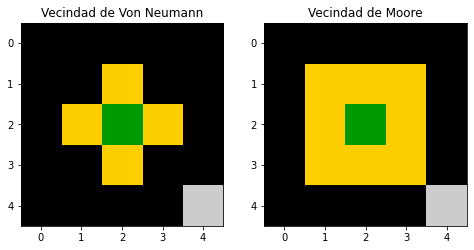

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from EpidemiologicalModels.DefineSpaceInCA import *

Vecindad_Moore = np.zeros((3,3)); Vecindad_Moore[1,1] = 2
Vecindad_Von_Neumann = np.ones((3,3))
Vecindad_Von_Neumann[0:,1] = 0; Vecindad_Von_Neumann[1,0:] = 0; Vecindad_Von_Neumann[1,1] = 2

figsize(8,4)

plt.subplot(1,2,1)
plt.title("Vecindad de Von Neumann")
plt.imshow(color(Von_Neumann(Vecindad_Von_Neumann,1,1)[0]),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,2,2)
plt.title("Vecindad de Moore")
plt.imshow(color(Moore(Vecindad_Moore,1,1)[0]), cmap="nipy_spectral",interpolation='nearest')

plt.show()

### Reglas de evolución

Las reglas de evolución definen la manera en la que cambian los estados de cada célula teniendo en cuenta el estado de sus vecinos. En general definimos una regla de evolución $\phi$ como sigue:

$$\phi:\Sigma_x\times\overbrace{\Sigma\times\Sigma\times\cdots\times\Sigma}^{N}\longrightarrow\Sigma_x,$$

donde $N$ es la cantidad de vecinos de $x$ y $\Sigma_x$ el conjunto de estados que puede tomar $x$. 

Para determinar la evolución del espacio $\mathcal{L}$ se debe aplicar la regla de evolución simultáneamente sobre cada una de sus células. De ese modo podemos definir una regla global de evolución $\Phi$ como la aplicación de la regla $\phi$ sobre cada una de las células de un espacio $\mathcal{L}$.

Las reglas de evolución pueden ser de dos tipos:

* **Reglas determinísticas**
    Son aquellas en las que se define un estado para cada posible combinación de estados en la vecindad. Un ejemplo de esto son las **reglas de Wolfram** en las que se define la correspondencia entre los estados de una celda $x$ y sus vecinos con el estado posterior de la celda $x$. Consideremos como caso particular a la regla 30 en la que se define la siguiente correspondencia:
    
    ![texto del enlace](Imagenes/regla30.PNG)
    
     Al tratarse de una regla sobre un espacio 1-dimensional los vecinos de cada célula son los que se encuentran a lados izquierdo y derecho, como se ve en la figura (2-10). En este caso el conjunto de estados es de la forma $\Sigma=\{0,1\}$. En la figura (2-11) podemos apreciar la evolución del espacio de células $\mathcal{L}$ en 15 y 250 iteraciones respectivamente para la aplicación de la regla 30 denotada como $\phi_{30}$.
     
     ![texto del enlace](Imagenes/regla30en15.PNG)
     ![texto del enlace](Imagenes/regla30en250.PNG)
     
*   **Reglas totalísticas**
    
    A diferencia de las reglas determinísticas, las reglas totalísticas no establecen una correspondencia directa entre estados y combinaciones de vecindades, sino que en su lugar utilizan un componente probabilístico. Esto significa que dependiendo de la combinación, la célula sobre la que se aplica la regla puede tomar un estado de un subconjunto del conjunto de estados $\Sigma$. 
    
    Existe un subtipo de este tipo de reglas conocido como las reglas semi-totalísticas, en las que el subconjunto que se considera para la evolución de la célula sobre la que se aplica la regla depende del estado de la misma célula. De ese modo:
    
    \begin{align*}
        \phi:\Sigma_x\times\overbrace{\Sigma\times\Sigma\times\cdots\times\Sigma}^{N}&\longrightarrow \left\{ \begin{array}{cc}
        \sigma_1 \subseteq \Sigma_x & \text{si el estado de }x\text{ es }s_1 \\
        \sigma_2 \subseteq \Sigma_x & \text{si el estado de }x\text{ es }s_2 \\
        \vdots & \vdots \\
        \sigma_k \subseteq \Sigma_x & \text{si el estado de }x\text{ es }s_k
        \end{array} \right. ,
    \end{align*}
    
    donde $k$ es la cantidad de posibles estados que puede tomar $x$.

A pesar de que las reglas determinísticas pueden generar resultados interesantes su implementación computacional no resulta muy cómoda, sobre todo si consideramos espacios de células de más de una dimensión. De acuerdo con [16], la cantidad de posibles combinaciones o reglas que se pueden definir si usáramos las del tipo determinista serían:

$$N_r=\#\Sigma^{\#\Sigma^N},$$

donde $\#\Sigma$ es la cantidad de estados en $\Sigma$ y $N$ es la cantidad de vecinos que se consideran en el sistema de vecindades. Por ejemplo, para el caso de la regla 30 la cantidad de reglas que se pueden definir es igual a $2^{2^2}=16$. Esto representa una complicación al trabajar con espacios de más de una dimensión por lo que para los propósitos del proyecto nos enfocaremos únicamente sobre las reglas totalísticas y para ser más específicos sobre las reglas semi-totalísticas, esto debido al contexto de nuestro proyecto.

Una vez aclarados todos los conceptos que abarcan los autómatas celulares podemos dar una definición formal de ellos:

**Definición 2.5.3:** Un autómata celular es una la tupla de la forma  $A=(\mathcal{L},\Sigma,\mathcal{N}(\mathcal{L}),\phi)$ con $\mathcal{N}(\mathcal{L})$ un sistema de vecindades sobre $\mathcal{L}$.

1. Simulating Complex Systems by Cellular Automata
2. MODELING INFECTIOUS DISEASES USING GLOBAL STOCHASTIC CELLULAR AUTOMATA
3. Epidemiological modeling with a population density map-based cellular automata simulation system
4. Descripción y Aplicaciones de los Autómatas Celulares
5. Autómatas Celulares y su Aplicación en Computación